# Solar data cleaning steps
The data  in the following notebook is from NYSERDA.
It is the Solar Electric Programs Reported by NYSERDA: Beginning 2000
The link for the data can be found here:
https://data.ny.gov/Energy-Environment/Solar-Electric-Programs-Reported-by-NYSERDA-Beginn/3x8r-34rs

In [56]:
#Importing pandas and datetime 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
#We name the dataset 'solar' and save it as a pandas dataframe
solar = pd.read_csv(r'C:\Users\jabakoyas\Downloads\Solar_Electric_Programs_Reported_by_NYSERDA__Beginning_2000.csv')

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
#A quick look at 5 rows from the dataset using 'head' command
solar.head()

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
0,12/31/2019,4362-46733,Scotia,Schenectady,NY,12302,Residential,Residential/Small Commercial,PON 2112,National Grid,...,20.0,22950.0,5100.0,5.10,5987,No,No,No,NaN,"Scotia, NY 12302\n(42.866806, -73.967054)"
1,12/31/2019,4629-81627,Ridge,Suffolk,NY,11961,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,24.0,38552.2,1570.0,7.85,9212,No,No,No,NaN,"Ridge, NY 11961\n(40.893078, -72.883233)"
2,12/31/2019,4704-75046,Stuyvesant,Columbia,NY,12173,Residential,Residential/Small Commercial,PON 2112,National Grid,...,20.0,29786.0,3180.0,5.30,6221,No,No,No,NaN,"Stuyvesant, NY 12173\n(42.376918, -73.758588)"
3,12/31/2019,4704-78623,Lynbrook,Nassau,NY,11563,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,22.0,32032.0,1144.0,5.72,6714,No,No,No,NaN,"Lynbrook, NY 11563\n(40.657513, -73.673957)"
4,12/31/2019,4704-90236,Yonkers,Westchester,NY,10703,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,17.0,24752.0,2652.0,4.42,5188,No,No,No,NaN,"Yonkers, NY 10703\n(40.957068, -73.880829)"


In [60]:
#lets look at the number of rows and columns and their names
print(solar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103765 entries, 0 to 103764
Data columns (total 30 columns):
Reporting Period                         103765 non-null object
Project Number                           103765 non-null object
City                                     103765 non-null object
County                                   103765 non-null object
State                                    103765 non-null object
Zip Code                                 103765 non-null int64
Sector                                   103765 non-null object
Program Type                             103765 non-null object
Solicitation                             103765 non-null object
Electric Utility                         103765 non-null object
Purchase Type                            98657 non-null object
Date Application Received                103765 non-null object
Date Completed                           99634 non-null object
Project Status                           103765 non-null obj

From the above, we have 103,765 rows and 30 columns.
Some rows contain missing data.

In [63]:
print('The data comes from', len(solar['Zip Code'].unique()), 'unique zipcodes in New York State')

The data comes from 1752 unique zipcodes in New York State


Since the analysis being done is for New York City, in the following lines we will conduct cleaning to select only New York City.

There are two ways used here to do the cleaning to get only NYC data.

The first method is by using the 'County' column of the data. The issue with this method, which will be shown below, is that there are counties that are outside NYC for which the data was wrongly entered as NYC. The county with the most errors is New York County. The assumption here is that it is easy to mistakenly enter 'New York' for county. 
It does not help for data quality that we have a State, a City, and a County all sharing the same name. 

The second method is to get a list of all zip codes for each Borough of New York City, then to select for those zip codes in the NYSERDA data, and by creating a new column for the Borough. This was also done below. The problem here is people enter the wrong zip code, or zip codes that don't exist. The system in which this data was entered does not prevent wrong data from being entered. 

After using both methods, a comparison is made to see how well the two methods compare. 
Again, the majority of issues are projects outside of NYC where the data was entered as New York County.


So below we filter using the County column of the data:

In [64]:
#We will filter only new york city data. Since the data is listed by county, we will use the known counties to filter:
NYC_COUNTIES= ['Queens', 'Bronx', 'Kings', 'New York', 'Richmond']
solar_nyc = solar.loc[solar['County'].isin(NYC_COUNTIES)]
solar_nyc.to_csv(r'C:\Users\jabakoyas\Downloads\nyc_list.csv')


In [9]:
solar_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23815 entries, 3 to 102902
Data columns (total 30 columns):
Reporting Period                         23815 non-null object
Project Number                           23815 non-null object
City                                     23815 non-null object
County                                   23815 non-null object
State                                    23815 non-null object
Zip Code                                 23815 non-null int64
Sector                                   23815 non-null object
Program Type                             23815 non-null object
Solicitation                             23815 non-null object
Electric Utility                         23815 non-null object
Purchase Type                            23188 non-null object
Date Application Received                23815 non-null object
Date Completed                           21829 non-null object
Project Status                           23815 non-null object
Contracto

After filtering for NYC, he have 23815 rows

Next, we use the second method of selecting for NYC projects by taking a list of known zip codes for NYC.

We save all the zip codes to their respective boroughs:

In [37]:
Bronx_zipcodes = [10453, 10457, 10460, 10458, 10467, 10468
,10451, 10452, 10456,10454, 10455, 10459, 10474, 10463, 10471
,10466, 10469, 10470, 10475, 10461, 10462,10464, 10465, 10472, 10473, 10803, ]

In [38]:
Brooklyn_zipcodes = [11212, 11213, 11216, 11233, 11238
, 11209, 11214, 11228, 11204, 11218, 11219, 11230,11234, 11236, 11239
,11223, 11224, 11229, 11235, 11201, 11205, 11215, 11217, 11231
, 11203, 11210, 11225, 11226, 11207, 11208,11211, 11222
, 11220, 11232, 11206, 11221, 11237, 11249]

In [39]:
Manhattan_zipcodes = [10026, 10027, 10030, 10037, 10039
,10001, 10011, 10018, 10019, 10020, 10036
,10029, 10035,10010, 10016, 10017, 10022
,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280
,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128
,10023, 10024, 10025,10031, 10032, 10033, 10034, 10040, 10282,10278]

In [40]:
Queens_zipcodes = [11001, 11351,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11364
,11354, 11355, 11356, 11357, 11358, 11359, 11360
, 11365, 11366, 11367, 11405, 11412, 11423, 11432, 11433, 11434, 11435, 11436
, 11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385
,11691, 11692, 11693, 11694, 11695, 11697,11004
,11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429
, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421
, 11368, 11369, 11370, 11371, 11372, 11373,11374,11375, 11377, 11378,11379,11385, 11405,11001,11439]


In [41]:
Staten_zipcodes = [10302, 10303, 10310,10306, 10307,10313,  10308, 10309, 10312,10301, 10304, 10305,10311,10314]

Next we create a Borough column and save the borough of our data by searching for its zipcode from the above list

In [86]:
#Here we assign each row a borough by using the list of zipcodes for each borough
solar['Borough'] = solar['Zip Code'].apply(lambda x: 'Bronx' if x in Bronx_zipcodes 
    else 'Brooklyn' if x in Brooklyn_zipcodes 
    else 'Queens' if x in Queens_zipcodes
    else 'Manhattan' if x in Manhattan_zipcodes
    else 'staten Island' if x in Staten_zipcodes
    else 'na') 
solar_nyc_b = solar[solar['Borough']!='na']

Now that we have the two methods complete, we compare the numbers using the County method and the Borough method:

In [91]:
#Below is the borough breakdown
print(solar_nyc_b.Borough.value_counts())
print(len(solar_nyc_b))

Queens           9637
staten Island    7651
Brooklyn         4533
Bronx            2283
Manhattan         251
Name: Borough, dtype: int64
24355


In [92]:
#Below is the County breakdown
print(solar_nyc.County.value_counts())
print(len(solar_nyc))

Queens      9413
Richmond    7558
Kings       4357
Bronx       2117
New York     840
Name: County, dtype: int64
24285


It is apparent from the above that New York county and Manhattan Borough have a huge difference. 

We then merge the two datasets by using the solar_nyc and using the zipcode filters of NYC:

In [93]:
solar_nyc['Borough'] = solar_nyc['Zip Code'].apply(lambda x: 'Bronx' if x in Bronx_zipcodes 
    else 'Brooklyn' if x in Brooklyn_zipcodes 
    else 'Queens' if x in Queens_zipcodes
    else 'Manhattan' if x in Manhattan_zipcodes
    else 'staten Island' if x in Staten_zipcodes
    else 'na') 

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


After the above, we look again at the two methods:

In [94]:
print('Using the Borough:\n', solar_nyc.Borough.value_counts())
print('======================')
print('Using the County:\n', solar_nyc.County.value_counts())

Using the Borough:
 Queens           9489
staten Island    7644
Brooklyn         4528
Bronx            2159
Manhattan         249
na                216
Name: Borough, dtype: int64
Using the County:
 Queens      9413
Richmond    7558
Kings       4357
Bronx       2117
New York     840
Name: County, dtype: int64


In [99]:
#Here we print the number of rows with unavailable Borough but New York for county
#Please note that Borough column was created in this notebook and did not come with the data
solar_nyc[(solar_nyc['Borough']=='na') & (solar_nyc['County']=='New York') ]

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1,Completed,Borough
59806,12/31/2019,5159-61417,Lindenhurst,New York,NY,11757,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,750.0,2.55,2993,No,No,No,NaN,"Lindenhurst, NY 11757\n(40.690158, -73.374734)",2015.0,na
64766,12/31/2019,68136,Island Park,New York,NY,11558,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,0.0,8.18,9596,NaN,No,No,Residential,"Island Park, NY 11558\n(40.604544, -73.653739)",2017.0,na
65838,12/31/2019,5218-56252,Great Neck,New York,NY,11023,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,2964.0,13.00,15260,No,No,No,NaN,"Great Neck, NY 11023\n(40.798569, -73.734476)",2015.0,na
68776,12/31/2019,88949,Tuckahoe,New York,NY,10707,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,2394.0,5.99,7025,NaN,No,No,NaN,"Tuckahoe, NY 10707\n(40.95945, -73.823004)",2017.0,na
69193,12/31/2019,100984,Yonkers,New York,NY,10701,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,2087.0,7.70,9033,NaN,No,No,NaN,"Yonkers, NY 10701\n(40.944049, -73.881102)",2018.0,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102885,12/31/2019,215239,Hammond,New York,NY,13646,Non-Residential,Residential/Small Commercial,PON 2112,National Grid,...,3564.0,7.92,9297,NaN,No,No,NaN,"Hammond, NY 13646\n(44.44678, -75.681701)",NaN,na
102894,12/31/2019,226823,Roosevelt,New York,NY,11575,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,1830.0,6.10,7160,NaN,No,No,NaN,"Roosevelt, NY 11575\n(40.680654, -73.586597)",NaN,na
103224,12/31/2019,219566,Slingerlands,New York,NY,12159,Residential,Residential/Small Commercial,PON 2112,National Grid,...,3308.0,9.45,11093,NaN,No,No,NaN,"Slingerlands, NY 12159\n(42.646421, -73.874892)",NaN,na
103381,12/31/2019,224416,Middleport,New York,NY,14105,Residential,Residential/Small Commercial,PON 2112,National Grid,...,3812.0,10.89,12783,NaN,No,No,NaN,"Middleport, NY 14105\n(43.196189, -78.488556)",NaN,na


In [100]:
#Here we do something a little different from above
#What we do is look at Borough that is not Manhattan but county New York (which is the county for Manhattan);
solar_nyc[(solar_nyc['Borough']!='Manhattan') & (solar_nyc['County']=='New York') ]

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1,Completed,Borough
6628,12/31/2019,4089-041,New York,New York,NY,11233,Non-Residential,Residential/Small Commercial,PON 1050,Consolidated Edison,...,84000.0,22.20,26059,NaN,No,No,NaN,"New York, NY 11233\n(40.67783, -73.919096)",2011.0,Brooklyn
15282,12/31/2019,4250-58213,Staten Island,New York,NY,10312,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,5600.0,7.84,9203,No,No,No,NaN,"Staten Island, NY 10312\n(40.542961, -74.178263)",2016.0,staten Island
17723,12/31/2019,4122-002,Queens,New York,NY,11101,Non-Residential,Residential/Small Commercial,PON 1050,Consolidated Edison,...,224500.0,51.24,60148,NaN,No,No,NaN,"Queens, NY 11101\n(40.746647, -73.939547)",2010.0,Queens
20833,12/31/2019,4437-20496,New York,New York,NY,10301,Non-Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,35280.0,20.16,23665,NaN,No,No,NaN,"New York, NY 10301\n(40.628276, -74.094327)",2011.0,staten Island
21447,12/31/2019,4170-22965,Queens,New York,NY,11357,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,12250.0,7.03,8252,NaN,No,No,NaN,"Queens, NY 11357\n(40.785459, -73.811044)",2011.0,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103281,12/31/2019,220698,Brooklyn,New York,NY,11235,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,4290.0,14.30,16786,NaN,No,No,NaN,"Brooklyn, NY 11235\n(40.584205, -73.950101)",NaN,Brooklyn
103381,12/31/2019,224416,Middleport,New York,NY,14105,Residential,Residential/Small Commercial,PON 2112,National Grid,...,3812.0,10.89,12783,NaN,No,No,NaN,"Middleport, NY 14105\n(43.196189, -78.488556)",NaN,na
103408,12/31/2019,225104,Highland Falls,New York,NY,10928,Residential,Residential/Small Commercial,PON 2112,Orange and Rockland Utilities,...,1243.0,7.25,8504,NaN,No,No,NaN,"Highland Falls, NY 10928\n(41.336299, -74.01954)",NaN,na
103655,12/31/2019,184018,Brooklyn,New York,NY,11212,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,2060.0,6.87,8061,NaN,No,No,NaN,"Brooklyn, NY 11212\n(40.661868, -73.913254)",NaN,Brooklyn


Above we see we have a lot of entries located across the different five boroughs which show the wrong County of New York

The conclusion from the cleaning steps conducted in this notebook is not to rely on the 'County' column to filter projects in the NYSERDA data for New York City and to instead rely more on zip codes by creating a Borough column using a list of zip codes found in each Borough.

Below we save the data for NYC created using the zip code method: 

Please note that the new Borough column is kept in the new dataset. If you wish to remove the Borough, uncomment the 'iloc' below.

In [53]:
cleaned_data = solar_nyc_b#.iloc[:,:-1]
cleaned_data.to_csv(r'C:\Users\jabakoyas\Downloads\cleaned_nyserda_data.csv')
cleaned_data

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
3,11/30/2019,4243-99046,Glen Oaks,Queens,NY,11004,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,36.0,50620.0,5886.0,11.77,13818.0,No,No,No,NaN,"Glen Oaks, NY 11004\n(40.745241, -73.712092)"
11,11/30/2019,83105,Brooklyn,Kings,NY,11208,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,13.0,17959.0,1612.0,4.03,4731.0,NaN,No,No,NaN,"Brooklyn, NY 11208\n(40.673742, -73.872692)"
12,11/30/2019,98173,Queens,Queens,NY,11373,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,29670.0,2042.0,6.90,8099.0,NaN,No,No,NaN,"Queens, NY 11373\n(40.738576, -73.878172)"
13,11/30/2019,101095,Bronx,Bronx,NY,10465,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,13.0,18716.0,1716.0,4.29,5036.0,NaN,No,No,NaN,"Bronx, NY 10465\n(40.825915, -73.820974)"
16,11/30/2019,121954,Bronx,Bronx,NY,10457,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,19209.6,1357.0,5.80,6808.0,NaN,No,No,NaN,"Bronx, NY 10457\n(40.846788, -73.899203)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102896,11/30/2019,207989,Staten Island,Richmond,NY,10304,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,16.0,21673.0,1536.0,5.12,6010.0,NaN,No,No,NaN,"Staten Island, NY 10304\n(40.606587, -74.092177)"
102898,11/30/2019,187162,Staten Island,Richmond,NY,10309,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,64.0,72467.2,4116.0,21.44,25167.0,NaN,No,No,NaN,"Staten Island, NY 10309\n(40.532063, -74.215396)"
102899,11/30/2019,189102,Brooklyn,Kings,NY,11212,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,70000.0,2160.0,7.20,8452.0,NaN,No,No,NaN,"Brooklyn, NY 11212\n(40.661868, -73.913254)"
102900,11/30/2019,206025,Staten Island,Richmond,NY,10303,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,11.0,13554.2,1006.0,3.36,3938.0,NaN,No,No,NaN,"Staten Island, NY 10303\n(40.629735, -74.162953)"


Below is some unrelated analysis looking at number of projects completed in NYC over the years by year 

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  
C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

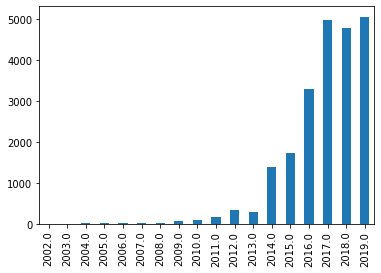

In [113]:
solar_nyc_b['Date Completed'] = pd.to_datetime(solar_nyc_b['Date Completed'])
#Below is the number of projects completed in the given years in nyc
by_year = solar_nyc_b['Date Completed'].dt.year.value_counts()
by_year
#Below we plot a bar graph of the project completions by year for New York City
by_year.sort_index().plot('bar')

solar_nyc_b['Completed'] = solar_nyc_b['Date Completed'].dt.year


In [114]:
#Looking at how many projects are active, and how many complete
solar_nyc['Project Status'].value_counts()

Complete    22191
Pipeline     2094
Name: Project Status, dtype: int64

The above indicates that there are 2,094 projects still in the pipeline, whereas 22,191 projects are already completed.